## 결정 트리  
결정 트리는 결정에 다다르기 위해 예/아니오 질문으로 이어 나가면서 학습  

**노드** : 질문이나 정답을 담은 상자  
**리프** : 질문들 끝에 마지막 노드  
**루트노드** : 맨 위 노드(모든 데이터셋)  
**순수노드** : 타깃 하나로만 이뤄진 리프 노드

---

#### 결정 트리의 복잡도 제어

**사전 가지치기** : 트리 생성을 조기 중단하는 전략, 트리의 최대 깊이나 리프의 최대 개수를 제한 혹은 노드 분할 포인트의 최소 개수를 지정  
**사후 가지치기(가지치기)** : 트리 생성 후, 데이터 포인트가 적은 노드를 삭제하거나 병합  

#### scikit-learn의 결정 트리  
**DecisionTreeClassifier**  
**DecisionTreeRegressor**  


    * scikit-learn은 사전 가지치기만 지원  


사전 가지치기 : max_depth(질문 수 조절), max_leaf_nodes(말단 노드 최대 수), min_samples_leaf(말단 노드 최소 수) => 과대 적합 방지

---

유방암 데이터셋을 이용한 사전 가지치기 효과 확인

In [ ]:
## 폰트 없다는 경고 메세지 삭제를 위한 라이브러리 호출
import warnings
warnings.filterwarnings(action='ignore')
##

In [ ]:
# 데이터 라이브러리 호출
from sklearn.datasets import load_breast_cancer

# 데이터 분리 라이브러리 호출
from sklearn.model_selection import train_test_split

# 모델 라이브러리 호출
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
cancer = load_breast_cancer()

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state = 42
)

# 모델 생성
tree = DecisionTreeClassifier(random_state=0)

# 모델 훈련
tree.fit(X_train, y_train)

# 모델 정확도 확인
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


모든 리프 노드가 순수 노드임으로 훈련 세트의 정확도는 100%  
(= 최종 분류가 모두 완벽하게 구분되었음으로 정확한 분석을 함)  

결정 트리의 깊이를 제한하지 않으면 트리가 무한정 깊어지고 복합해 질 수 있음  
=> 가지치기를 하지 않은 트리는 **과대적합** 되기 쉬움

---

max_depth 값을 설정하여 결정 트리를 제한

In [ ]:
# max_depth 값이 4인 모델 생성
tree = DecisionTreeClassifier(random_state=0, max_depth=4)

# 모델 훈련
tree.fit(X_train, y_train)

# 모델 정확도 확인
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


#### max_depth를 설정해둔 경우 **훈련 세트의 정확도는 떨어트리지만 테스트 세트의 성능은 개선된 것을 확인 가능**

---

결정 트리 분석

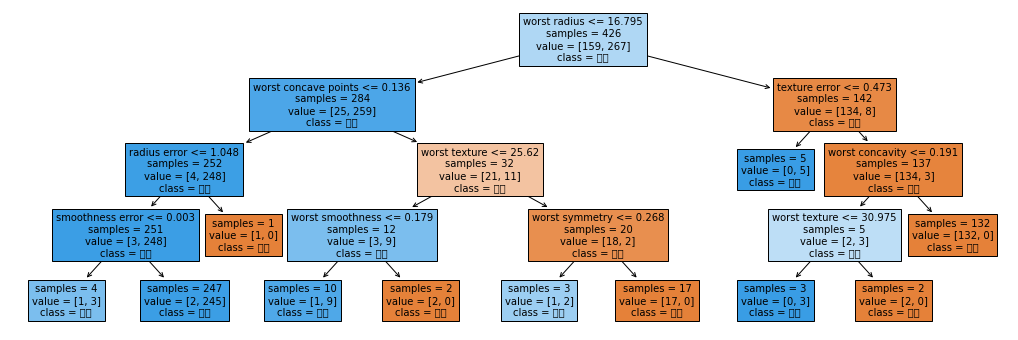

In [ ]:
# 트리 시각화의 데이터 위한 라이브러리 호출
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
plot_tree(tree, class_names=["악성", "양성"], feature_names=cancer.feature_names,
impurity=False,
filled=True,
fontsize=10)
plt.show()

트리에 시각화를 통해  
비전문가에게 머신러닝의 알고리즘을 설명하기에 좋을 정도로 시각화 가능 ex) worst_radius로 먼저 구분  
* 하지만 깊이가 4만 되어도 **트리가 매우 장황해짐***

---

트리의 특성 중요도  
    * 각각의 트리가 얼마나 중요한지 파악  
    * 0~1값으로 높을수록 타깃 클래스를 예측하는데 중요했다는 의미

특성 중요도 시각화

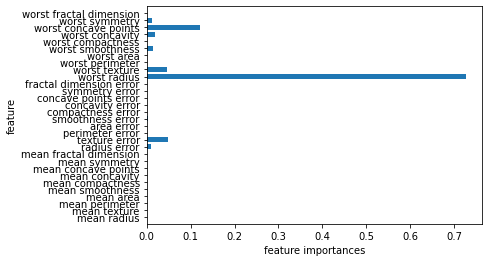

In [ ]:
from sklearn.base import _num_features
import numpy as np

# 모델에 대한 중요도 시각화 함수 형성
def plot_feature_importances_cancer(model):
    # 각 특성별 중요도 저장
    n_features = cancer.data.shape[1]
    # 각 특성별 중요도 가로 bar로 설정
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    # 눈금 설정
    plt.yticks(np.arange(n_features), cancer.feature_names)
    # 라벨 설정
    plt.xlabel('feature importances')
    plt.ylabel('feature')
    # 범위 설정
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

**"worst radius"** 가 가장 중요한 특성  

첫 번째 노드가 유효하다 = 예측이 상당히 유의미하다  

* 단, "importances가 낮다 = 쓸모없다" 는 잘못된 생각

### 결정 트리의 장단점
* 장점  
    * 시각화가 쉬움  
    * 데이터 크기에 영향을 받지 않음  
    * 데이터 크기에 영향을 받지 않음 (= 정규화, 표준화 필요 없음)  
* 단점
    * 과대적합이 자주 발생